# Computer Sales

In [1]:
import csv
import statistics as stats
import statistics_custom as stats_custom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pulls data on sales from a csv file
csv_file_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data\computersales.csv"
df = pd.read_csv(csv_file_path)
df.head()

,Sale ID,Company,Contact,Contact Sex,Contact Age,Contact City,Contact State,Product Company,Product ID,Product Type,Sale Price,Our Cost,Shipping Cost,Profit,Lead Source,Sale Month,Sale Year
0,1,PNT Designs,Paul Thomas,M,43,Carnegie,OH,HP,M01-F0024,Desktop,479.99,315.50,21.1,143.39,Website,January,2018
1,2,Ace Manufacturing,Margo Simms,F,37,Larimer,WV,HP,GT13-0024,Desktop,1249.99,998.00,21.1,230.89,Flyer 4,January,2018
2,3,Sammie's,Sam Stine,M,26,Pittsburgh,PA,Dell,I3670,Desktop,649.99,510.25,21.1,118.64,Website,February,2018
3,4,One Moe Time,Moe Eggert,M,35,St. Clair,PA,Dell,I3593,Laptop,399.99,310.50,17.4,72.09,Website,March,2018
4,5,Get Going Gym,Jessica Elk,F,55,Pittsburgh,PA,HP,15M-ED,Laptop,699.99,584.50,17.4,98.09,Flyer 4,March,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sale ID          39 non-null     int64  
 1   Company          39 non-null     object 
 2   Contact          39 non-null     object 
 3   Contact Sex      39 non-null     object 
 4   Contact Age      39 non-null     int64  
 5   Contact City     39 non-null     object 
 6   Contact State    39 non-null     object 
 7   Product Company  39 non-null     object 
 8   Product ID       39 non-null     object 
 9   Product Type     39 non-null     object 
 10  Sale Price       39 non-null     float64
 11  Our Cost         39 non-null     float64
 12  Shipping Cost    39 non-null     float64
 13  Profit           39 non-null     float64
 14  Lead Source      39 non-null     object 
 15  Sale Month       39 non-null     object 
 16  Sale Year        39 non-null     int64  
dtypes: float64(4), int

In [4]:
# drop duplicate columns if there is any
# check duplicate
df.duplicated(keep="first").sum()

np.int64(0)

## Measure of cental tendency

### Mean

In [5]:
## Groupby data based on `Sex`
sex_profit = df[["Contact Sex", "Profit"]]
sex_profit.groupby("Contact Sex").agg({"Profit": "mean"})


,Profit
Contact Sex,
F,148.381176
M,133.478636


In [6]:
# Calculate mean profit by Contact Sex using lambda and apply
sex_profit = df.groupby("Contact Sex")["Profit"].apply(lambda x: stats.mean(x))
sex_profit

Contact Sex
F    148.381176
M    133.478636
Name: Profit, dtype: float64

In [7]:
# Categorical columns 
Categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

mean_profit_by_category ={}
for cat_col in Categorical_cols:
    mean_profit_by_category[cat_col] = df.groupby(cat_col)["Profit"].apply(lambda x: stats.mean(x))

# for key, values in mean_profit_by_category.items():
#     print(f"{key}: {values} \n\n")


### Median

In [10]:
df.groupby("Contact Sex")["Profit"].apply(lambda x: stats.median(x))

Contact Sex
F    143.09
M    143.24
Name: Profit, dtype: float64

### Mode

In [11]:
df.groupby("Contact Sex")["Product Company"].apply(lambda x: stats.mode(x))

Contact Sex
F    HP
M    HP
Name: Product Company, dtype: object

In [12]:
df["Contact Sex"].mode()

0    M
Name: Contact Sex, dtype: object

## Measure of variability

### Variance

In [13]:
df.groupby("Contact Sex")["Profit"].apply(lambda x: stats.variance(x))

Contact Sex
F    3173.524449
M    1103.789984
Name: Profit, dtype: float64

### Standard Deviation

In [14]:
## Groupby data based on `Sex`
df.groupby("Contact Sex")["Profit"].apply(lambda x: stats.stdev(x))

Contact Sex
F    56.334043
M    33.223335
Name: Profit, dtype: float64

### Coeffcient Variation

In [15]:
# Function to calculate Coefficient of Variation
def calculate_cv(group):
    mean = stats.mean(group)
    std_dev = stats.stdev(group)
    return (std_dev / mean) * 100

# sex_cv = df.groupby("Contact Sex")["Profit"].apply(calculate_cv)    
sex_cv = df.groupby("Contact Sex")["Profit"].agg(calculate_cv)    
sex_cv

Contact Sex
F    37.965761
M    24.890376
Name: Profit, dtype: float64

### Covariance

In [16]:
# Function to calculate covariance
def calculate_covariance(x, y):
    mean_x = stats.mean(x)
    mean_y = stats.mean(y)
    cov = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y)) / (len(x) - 1)
    return cov

# Calculate covariance between Profit and Sales
covariance = calculate_covariance(df["Profit"], df["Sale Price"])
covariance

12485.455465587045

In [17]:
# Calculate covariance using numpy
covariance_matrix = np.cov(df["Profit"], df["Sale Price"])
print(covariance_matrix)
covariance = covariance_matrix[0][1]
print(f"Covariance between Profit and Sales: {covariance}")

[[  2002.2559413   12485.45546559]
 [ 12485.45546559 117120.78272605]]
Covariance between Profit and Sales: 12485.45546558704


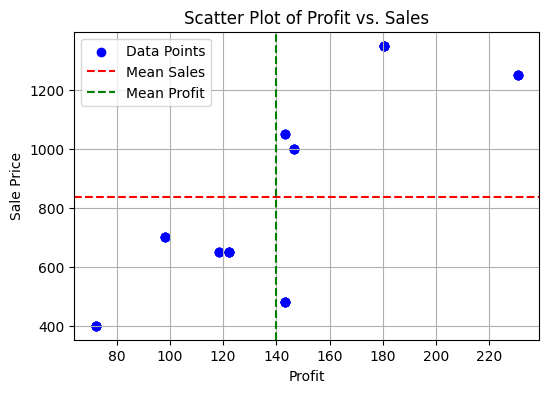

In [18]:
# Create a scatter plot to visualize covariance
plt.figure(figsize=(6, 4))
plt.scatter(df["Profit"], df["Sale Price"], color='blue', label='Data Points')
plt.title('Scatter Plot of Profit vs. Sales')
plt.xlabel('Profit')
plt.ylabel('Sale Price')
plt.grid()
plt.axhline(y=np.mean(df["Sale Price"]), color='r', linestyle='--', label='Mean Sales')
plt.axvline(x=np.mean(df["Profit"]), color='g', linestyle='--', label='Mean Profit')
plt.legend()
plt.show()

### Correlation Coefficient

In [19]:
# Calculate Pearson's correlation coefficient using lambda and apply
correlation_coefficient = np.corrcoef(df["Profit"], df["Sale Price"])
print(f"Correlation Coefficient between Profit and Sales: \n{correlation_coefficient}")

Correlation Coefficient between Profit and Sales: 
[[1.         0.81531909]
 [0.81531909 1.        ]]


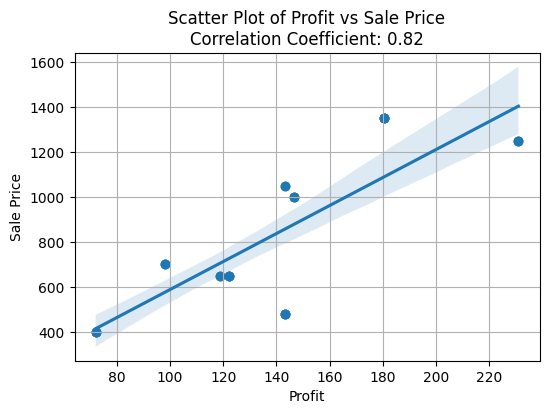

In [20]:
# Calculate the correlation coefficient
correlation_coefficient = df["Profit"].corr(df["Sale Price"])

# Set up the plot
plt.figure(figsize=(6, 4))
sns.regplot(x="Profit", y="Sale Price", data=df, marker='o')

# Add correlation coefficient to the plot
plt.title(f'Scatter Plot of Profit vs Sale Price\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Profit')
plt.ylabel('Sale Price')

# Show the plot
plt.grid(True)
plt.show()

### Interquartile Range (IQR)

In [27]:
# Functions used in this project
""" Visualize the Numerical Features """
def visualize_num_feature(data):
    plt.figure(figsize = (8, 3))
    plt.subplot(1,2,1)
    sns.boxplot(data)
    plt.subplot(1,2,2)
    sns.histplot(data, bins=20, kde=True)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(data):
    stat =  data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))    

Visualize sales Feature


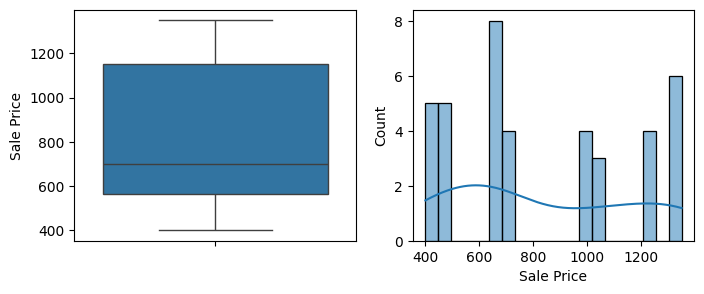

count      39.000000
mean      837.169487
std       342.229138
min       399.990000
25%       564.990000
50%       699.990000
75%      1149.990000
max      1349.990000
Name: Sale Price, dtype: float64
The upper and lower bounds for suspected outliers are 2027.49 and -312.51
Visualize profit Feature


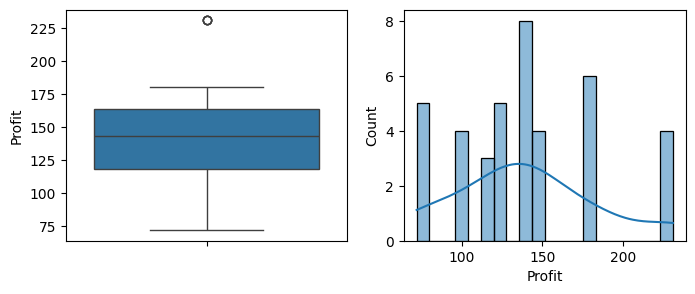

count     39.000000
mean     139.974615
std       44.746575
min       72.090000
25%      118.640000
50%      143.090000
75%      163.515000
max      230.890000
Name: Profit, dtype: float64
The upper and lower bounds for suspected outliers are 230.82749999999996 and 51.32750000000003


In [28]:
# Sales
print('Visualize sales Feature')
visualize_num_feature(df["Sale Price"])
stat_summary(df["Sale Price"]) 

# Profit
print('Visualize profit Feature')
visualize_num_feature(df["Profit"])
stat_summary(df["Profit"]) 

### Correlation plot

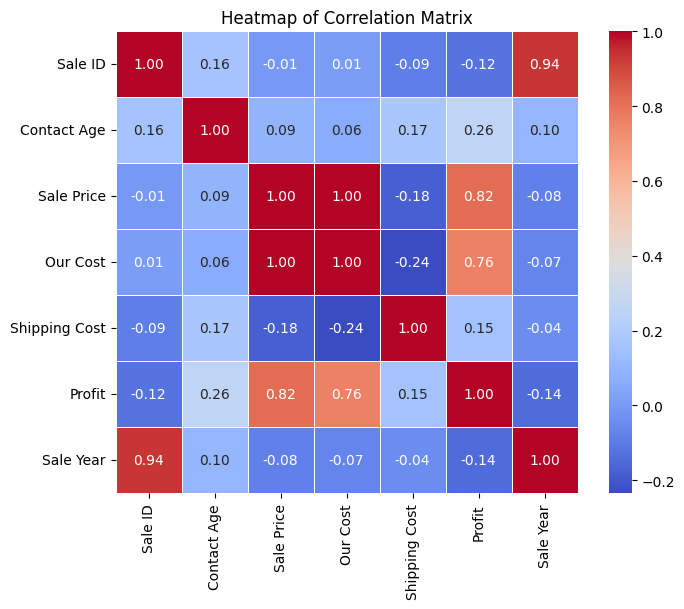

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title and show the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()